# Parameters

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

"""In order to provide a better presentation of the graphs we use the rcParams options shown below."""

import matplotlib
matplotlib.rcParams['text.usetex'] = False
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['figure.figsize'] = (11.0, 8.0)

from numpy import cos, sin

label_size = 20

In [ ]:
from numpy import sqrt

In [ ]:
import time
from numba import jit
from numpy import sin, cos

T0=time.time()

In [ ]:
t_final=320

In [ ]:
### Parameters


#Number of atoms

N=40

#Coupling constant

gC=1

# Frequency shift A

delta_A=2

# Frequency shift B

delta_B=2

# Detuning frequency

DeltaC=20*gC*np.sqrt(N)

# Decaying photonic mode

KapC= 0



# Hamiltonian parameters (in the spin-model limit)

In [ ]:
chi=(gC**2)*DeltaC/( (KapC/2)**2 + DeltaC**2 )
GammaC=KapC*(gC**2)/( (KapC/2)**2 + DeltaC**2 )


In [ ]:
print(chi,GammaC)

0.007905694150420948 0.0


In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from numpy import sin, cos, sqrt
from numpy import sqrt
import time
from numba import jit
from scipy.sparse import identity
from scipy.sparse import lil_matrix
from scipy.sparse import csr_matrix
import numpy as np
from numpy import sqrt
import matplotlib.pyplot as plt
import time 
import itertools
from itertools import permutations
from numba import jit
from scipy.integrate import complex_ode
import time
import numpy as np
from scipy.integrate import odeint
from numba import jit
from numba import jit
from scipy import sparse
from numpy import sin, cos, exp
from scipy.sparse import identity
from numpy import transpose
from scipy.sparse import csc_matrix
from scipy.sparse.linalg import expm
import scipy.special


In [ ]:


def odeintz(func, z0, t, **kwargs):
   
    
    """An odeint-like function for complex valued differential equations.

    Inputs:
    ----------
      -func: function associated to dr/dt=f(x;t), where x is the set of parameters and variables to be determined
      -z0: 1d array with length N*(5N-1)/2
      -t: 1d array from t=0 to t=tf (parameter set by the user)
      - **kwargs: keyword arguments related with external functions to be used in odeint
    
    Return:
      -z: multivariable array with the solution of the differential equation associated with each variable"""

    
    
    

    # Disallow Jacobian-related arguments.
    _unsupported_odeint_args = ['Dfun', 'col_deriv', 'ml', 'mu']
    bad_args = [arg for arg in kwargs if arg in _unsupported_odeint_args]
    if len(bad_args) > 0:
        raise ValueError("The odeint argument %r is not supported by "
                         "odeintz." % (bad_args[0],))

    # Make sure z0 is a numpy array of type np.complex128.
    z0 = np.array(z0, dtype=np.complex128, ndmin=1)

    def realfunc(x, t, *args):
        z = x.view(np.complex128)
        dzdt = func(z, t, *args)
        # func might return a python list, so convert its return
        # value to an array with type np.complex128, and then return
        # a np.float64 view of that array.
        return np.asarray(dzdt, dtype=np.complex128).view(np.float64)

    result = odeint(realfunc, z0.view(np.float64), t, **kwargs)

    if kwargs.get('full_output', False):
        z = result[0].view(np.complex128)
        infodict = result[1]
        return z, infodict
    else:
        z = result.view(np.complex128)
        return z

## Description of operators

def dagger(A):
    return np.transpose(np.conjugate(A))




"""In order to provide a better presentation of the graphs we use the rcParams options shown below."""


matplotlib.rcParams['text.usetex'] = False
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['figure.figsize'] = (11.0, 8.0)

In [ ]:
pip install sdeint

     |████████████████████████████████| 41 kB 324 kB/s 
  Created wheel for sdeint: filename=sdeint-0.2.2-py3-none-any.whl size=27832 sha256=d986a49f367ab8c7ad857d9692a916c172449bdc94b59ea5fd699d97af3bdedb
  Stored in directory: /root/.cache/pip/wheels/f3/1d/ed/ec3ca11c90feaa579fe504b5da5c6ae00a499303764788d653
Successfully built sdeint


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from numpy import random, zeros, sqrt,cos,sin

import matplotlib.pyplot as plt
import numpy as np
import sdeint
import time
from sdeint import itoint, stratint, itoSRI2, stratKP2iS,itoEuler
from numba import jit
import numbers

from numpy import sqrt, zeros, diag, random, real, array, complex_, transpose, conjugate, exp, matmul, real


import matplotlib
import matplotlib.pyplot as plt

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

"""In order to provide a better presentation of the graphs we use the rcParams options shown below."""

import matplotlib
matplotlib.rcParams['text.usetex'] = False
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['figure.figsize'] = (11.0, 8.0)

In [ ]:
def _check_args(f, G, y0, tspan, dW=None, IJ=None):
    """Do some validation common to all algorithms. Find dimension d and number
    of Wiener processes m.
    """
    if not np.isclose(min(np.diff(tspan)), max(np.diff(tspan))):
        raise SDEValueError('Currently time steps must be equally spaced.')
    # Be flexible to allow scalar equations. convert them to a 1D vector system
    if isinstance(y0, numbers.Number):
        if isinstance(y0, numbers.Integral):
            numtype = np.float64
        else:
            numtype = type(y0)
        y0_orig = y0
        y0 = np.array([y0], dtype=numtype)
        def make_vector_fn(fn):
            def newfn(y, t):
                return np.array([fn(y[0], t)], dtype=numtype)
            newfn.__name__ = fn.__name__
            return newfn
        def make_matrix_fn(fn):
            def newfn(y, t):
                return np.array([[fn(y[0], t)]], dtype=numtype)
            newfn.__name__ = fn.__name__
            return newfn
        if isinstance(f(y0_orig, tspan[0]), numbers.Number):
            f = make_vector_fn(f)
        if isinstance(G(y0_orig, tspan[0]), numbers.Number):
            G = make_matrix_fn(G)
    # determine dimension d of the system
    d = len(y0)
    if len(f(y0, tspan[0])) != d:
        raise SDEValueError('y0 and f have incompatible shapes.')
    message = """y0 has length %d. So G must either be a single function
              returning a matrix of shape (%d, m), or else a list of m separate
              functions each returning a column of G, with shape (%d,)""" % (
                  d, d, d)
    if callable(G):
        # then G must be a function returning a d x m matrix
        Gtest = G(y0, tspan[0])
        if Gtest.ndim != 2 or Gtest.shape[0] != d:
            raise SDEValueError(message)
        # determine number of independent Wiener processes m
        m = Gtest.shape[1]
    else:
        # G should be a list of m functions g_i giving columns of G
        G = tuple(G)
        m = len(G)
        Gtest = np.zeros((d, m))
        for k in range(0, m):
            if not callable(G[k]):
                raise SDEValueError(message)
            Gtestk = G[k](y0, tspan[0])
            if np.shape(Gtestk) != (d,):
                raise SDEValueError(message)
            Gtest[:,k] = Gtestk
    message = """From function G, it seems m==%d. If present, the optional
              parameter dW must be an array of shape (len(tspan)-1, m) giving
              m independent Wiener increments for each time interval.""" % m
    if dW is not None:
        if not hasattr(dW, 'shape') or dW.shape != (len(tspan) - 1, m):
            raise SDEValueError(message)
    message = """From function G, it seems m==%d. If present, the optional
              parameter I or J must be an array of shape (len(tspan)-1, m, m)
              giving an m x m matrix of repeated integral values for each
              time interval.""" % m
    if IJ is not None:
        if not hasattr(IJ, 'shape') or IJ.shape != (len(tspan) - 1, m, m):
            raise SDEValueError(message)
    return (d, m, f, G, y0, tspan, dW, IJ)

In [ ]:
steps1=3200000

tf=t_final
t_alt = np.linspace(0,tf,steps1)



In [ ]:
t_step=tf/steps1

t_step

0.0001

In [ ]:
matrix_array=[]

# X matrix


f10x=zeros((4, 4),dtype=complex_)
f10x[0][1]=(1/sqrt(2))
f10x=f10x+transpose(f10x)
matrix_array.append(f10x)

f20x=zeros((4, 4),dtype=complex_)
f20x[2][0]=(1/sqrt(2))
f20x=f20x+transpose(f20x)
matrix_array.append(f20x)

f30x=zeros((4, 4),dtype=complex_)
f30x[3][0]=(1/sqrt(2))
f30x=f30x+transpose(f30x)
matrix_array.append(f30x)

f21x=zeros((4, 4),dtype=complex_)
f21x[2][1]=(1/sqrt(2))
f21x=f21x+transpose(f21x)
matrix_array.append(f21x)

f31x=zeros((4, 4),dtype=complex_)
f31x[3][1]=(1/sqrt(2))
f31x=f31x+transpose(f31x)
matrix_array.append(f31x)

f32x=zeros((4, 4),dtype=complex_)
f32x[3][2]=(1/sqrt(2))
f32x=f32x+transpose(f32x)
matrix_array.append(f32x)

#Y Matrix

f10y=zeros((4, 4),dtype=complex_)
f10y[0][1]=-1j*(1/sqrt(2))
f10y=f10y+conjugate(np.transpose(f10y))
matrix_array.append(f10y)


f20y=zeros((4, 4),dtype=complex_)
f20y[0][2]=-1j*(1/sqrt(2))
f20y=f20y+conjugate(np.transpose(f20y))
matrix_array.append(f20y)


f30y=zeros((4, 4),dtype=complex_)
f30y[0][3]=-1j*(1/sqrt(2))
f30y=f30y+conjugate(np.transpose(f30y))
matrix_array.append(f30y)


f21y=zeros((4, 4),dtype=complex_)
f21y[1][2]=-1j*(1/sqrt(2))
f21y=f21y+conjugate(np.transpose(f21y))
matrix_array.append(f21y)

f31y=zeros((4, 4),dtype=complex_)
f31y[1][3]=-1j*(1/sqrt(2))
f31y=f31y+conjugate(np.transpose(f31y))
matrix_array.append(f31y)

f32y=zeros((4, 4),dtype=complex_)
f32y[2][3]=-1j*(1/sqrt(2))
f32y=f32y+conjugate(np.transpose(f32y))
matrix_array.append(f32y)


#Z matrix

f0z=np.zeros((4, 4),dtype=complex_)
f0z[0][0]=1
matrix_array.append(f0z)


f1z=np.zeros((4, 4),dtype=complex_)
f1z[1][1]=1
matrix_array.append(f1z)


f2z=np.zeros((4, 4),dtype=complex_)
f2z[2][2]=1
matrix_array.append(f2z)

In [ ]:
#-----------------------------------------------------------------------------------------------------


#Density matrix

Prop=0.5

Rho_0=zeros((4,4),dtype=complex_)

Rho_0[0][0]=Prop
Rho_0[3][3]=1-Prop

#--------------------------------

In [ ]:
#Averages Vector
Miu=[]

for j in matrix_array:
    Miu.append(np.trace(Rho_0*j))
    
    
#Covariance matrix
    

Cov_mat=zeros((15, 15),dtype=complex_)

for i in range(15):
    for j in range(15):
        Cov_mat[i][j]=  0.5*np.trace(matmul(Rho_0,( matmul(matrix_array[i],matrix_array[j])+matmul(matrix_array[j],matrix_array[i]))) ) -Miu[i]*Miu[j]  
        
                
        
Cov_mat_list=[]

for j in range(15):
    Cov_mat_list.append(list(real(Cov_mat[j])))    
    

from scipy import stats

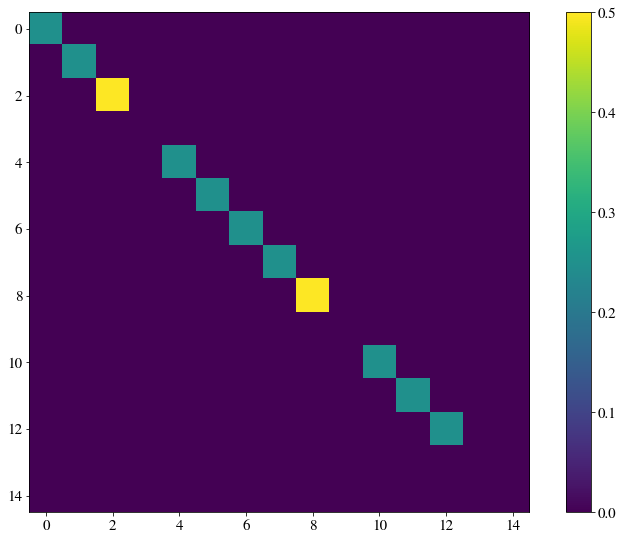

In [ ]:
# Plot Covariance Matrix


import numpy as np
import matplotlib.pyplot as plt

plt.imshow(np.real(Cov_mat))
plt.colorbar()
plt.show()

In [ ]:

@jit

def f(y, t):
    
    
    alpCx=y[15]
    alpCy=y[16]
            
    s10x=y[0]   #x10
    s20x=y[1]   #x20
    s30x=y[2]   #x30  
    s21x=y[3]   #x21 
    s31x=y[4]   #x31
    s32x=y[5]   #x32
            
    s10y=y[6]   #y10
    s20y=y[7]   #y20
    s30y=y[8]   #y30
    s21y=y[9]   #y21
    s31y=y[10]  #y31
    s32y=y[11]  #y32
            
    s0z=y[12]   #z0
    s1z=y[13]   #z1
    s2z=y[14]   #z2
    
    
    
    
    dalpCxdt = -DeltaC*alpCy-(KapC/2)*alpCx  +(gC/sqrt(2))*(s20y- s31y )

    dalpCydt = DeltaC*alpCx-(KapC/2)*alpCy-(gC/sqrt(2))*(s20x- s31x )

      
        
        
    ds10xdt   = (-gC/2)*(alpCx)*(s30y-s21y)+(-gC/2)*(alpCy)*(s21x-s30x) +( (delta_B-delta_A)/2 )*s10y
            
    ds20xdt = (-gC/sqrt(2))*alpCy* (s2z-s0z) - delta_A*s20y
    
    ds30xdt = (-gC/2)*(alpCx)*(s10y+s32y)+(-gC/2)*(alpCy)*(s10x+s32x) -( (delta_B+delta_A)/2 )*s30y
    
    ds21xdt = (-gC/2)*(alpCx)*(s10y+s32y)+(gC/2)*(alpCy)*(s10x+s32x) -( (delta_B+delta_A)/2 )*s21y
    
    ds31xdt = (-gC/sqrt(2))*alpCy* (s0z+2*s1z+s2z-N) - delta_B*s31y
    
    ds32xdt = (-gC/2)*(alpCx)*(s30y-s21y)-(gC/2)*(alpCy)*(s21x-s30x) + ( (delta_A-delta_B)/2 )*s32y
   



    ds10ydt = (gC/2)*(alpCx)*(s21x+s30x)-(gC/2)*(alpCy)*(s21y+s30y) + ( (delta_A-delta_B)/2 )*s10x
        
    ds20ydt = (gC/sqrt(2))*alpCx* (s2z-s0z) + delta_A*s20x
    
    ds30ydt = (gC/2)*(alpCx)*(s10x+s32x)-(gC/2)*(alpCy)*(s10y+s32y) + ( (delta_B+delta_A)/2 )*s30x
    
    ds21ydt = -(gC/2)*(alpCx)*(s10x+s32x)-(gC/2)*(alpCy)*(s10y+s32y) + ( (delta_B+delta_A)/2 )*s21x
    
    ds31ydt = (gC/sqrt(2))*alpCx* (s0z+2*s1z+s2z-N) + delta_B*s31x
    
    ds32ydt = (gC/2)*(alpCx)*(s21x+s30x) + (gC/2)*(alpCy)*(s30y+s21y) + ( (delta_B-delta_A)/2 )*s32x
    
        
        
                
    ds0zdt = (gC/sqrt(2))*alpCx* s20y - (gC/sqrt(2))*alpCy* s20x 
    
    ds1zdt = -(gC/sqrt(2))*alpCx* s31y + (gC/sqrt(2))*alpCy* s31x
            
    ds2zdt = -(gC/sqrt(2))*alpCx* s20y + (gC/sqrt(2))*alpCy* s20x
            


    dzdt = [ds10xdt,ds20xdt,ds30xdt,ds21xdt,ds31xdt,ds32xdt,ds10ydt,ds20ydt,ds30ydt,ds21ydt,ds31ydt,ds32ydt,ds0zdt,ds1zdt,ds2zdt   ,dalpCxdt,dalpCydt]
    return array(dzdt)
    
@jit

def GG(y, t):
    Arr=zeros((1,17))
    Arr[0][-1]=1
    Arr[0][-2]=1
    
    return diag(Arr[0])




In [ ]:
@jit

def random_vect(KapC=KapC):
    Hu=np.zeros((1,17))
    Hu[0][-1]=np.sqrt(KapC/4)*np.random.normal()
    Hu[0][-2]=np.sqrt(KapC/4)*np.random.normal()
    
    return Hu



# Euler-Maruyama

In [ ]:
Stochastic=1


@jit



def itoEulerImp(f, G, y0, tspan, dW=None):
    
    
    
    """Use the Euler-Maruyama algorithm to integrate the Ito equation
    dy = f(y,t)dt + G(y,t) dW(t)
    where y is the d-dimensional state vector, f is a vector-valued function,
    G is an d x m matrix-valued function giving the noise coefficients and
    dW(t) = (dW_1, dW_2, ... dW_m) is a vector of independent Wiener increments
    Args:
      f: callable(y, t) returning (d,) array
         Vector-valued function to define the deterministic part of the system
      G: callable(y, t) returning (d,m) array
         Matrix-valued function to define the noise coefficients of the system
      y0: array of shape (d,) giving the initial state vector y(t==0)
      tspan (array): The sequence of time points for which to solve for y.
        These must be equally spaced, e.g. np.arange(0,10,0.005)
        tspan[0] is the intial time corresponding to the initial state y0.
      dW: optional array of shape (len(tspan)-1, d). This is for advanced use,
        if you want to use a specific realization of the d independent Wiener
        processes. If not provided Wiener increments will be generated randomly
    Returns:
      y: array, with shape (len(tspan), len(y0))
         With the initial value y0 in the first row
    Raises:
      SDEValueError
    See also:
      G. Maruyama (1955) Continuous Markov processes and stochastic equations
      Kloeden and Platen (1999) Numerical Solution of Differential Equations
    """
    (d, m, f, G, y0, tspan, dW, __) = _check_args(f, G, y0, tspan, dW, None)
    Ns = len(tspan)
    h = (tspan[Ns-1] - tspan[0])/(Ns - 1)
    # allocate space for result
    y = np.zeros((Ns, d), dtype=type(y0[0]))

    y[0] = y0;
    for n in range(0, Ns-1):
        tn = tspan[n]
        yn = y[n]
        
        Rand_vectn=np.sqrt(h)*random_vect(KapC=KapC)[0]
        
        y[n+1] = yn + f(yn, tn)*h + Stochastic*Rand_vectn

    return y



@jit

def SDE_sol():
    
    Sum_TWA=zeros((15,1))

    for j in range(N):
        Sum_TWA=Sum_TWA+random.multivariate_normal(real(Miu), Cov_mat_list, 1).T
    
    y0=list(Sum_TWA.flatten())+[random.normal(0, 0.5),random.normal(0, 0.5)]
    
    return itoEulerImp(f, GG, y0, t_alt)

In [ ]:
from numpy import add
from numba import jit



itera=5000
@jit

def averages_sde(itera=itera,N=N):
    Results =zeros((steps1, 17))
    for j in range(itera):
        Trayec=SDE_sol()
        Results=add(Results,Trayec)
        print(j)
    
    return Results/itera

In [ ]:
import time
t0=time.time()

itera=2500

Result_varTWA_Col_SDE = averages_sde(itera=itera,N=N)
#Result_varTWA_Col_TWA = averages_sde(itera=itera,N=N)


t1=time.time()

print(t1-t0)

<ipython-input-23-d5efa40925e6>:7: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "averages_sde" failed type inference due to: Invalid use of type(CPUDispatcher(<function SDE_sol at 0x7f8810ad4a70>)) with parameters ()

During: resolving callee type: type(CPUDispatcher(<function SDE_sol at 0x7f8810ad4a70>))
During: typing of call at <ipython-input-23-d5efa40925e6> (12)


File "<ipython-input-23-d5efa40925e6>", line 12:
def averages_sde(itera=itera,N=N):
    <source elided>
    for j in range(itera):
        Trayec=SDE_sol()
        ^

  @jit
<ipython-input-23-d5efa40925e6>:7: NumbaWarning: 
Compilation is falling back to object mode WITHOUT looplifting enabled because Function "averages_sde" failed type inference due to: cannot determine Numba type of <class 'numba.core.dispatcher.LiftedLoop'>

File "<ipython-input-23-d5efa40925e6>", line 11:
def averages_sde(itera=itera,N=N):
    <source elided>
    Results =zeros((steps1, 17))
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

# TWA

In [ ]:
Stochastic=0


@jit



def itoEulerImpTWA(f, G, y0, tspan, dW=None):
    
    
    
    """Use the Euler-Maruyama algorithm to integrate the Ito equation
    dy = f(y,t)dt + G(y,t) dW(t)
    where y is the d-dimensional state vector, f is a vector-valued function,
    G is an d x m matrix-valued function giving the noise coefficients and
    dW(t) = (dW_1, dW_2, ... dW_m) is a vector of independent Wiener increments
    Args:
      f: callable(y, t) returning (d,) array
         Vector-valued function to define the deterministic part of the system
      G: callable(y, t) returning (d,m) array
         Matrix-valued function to define the noise coefficients of the system
      y0: array of shape (d,) giving the initial state vector y(t==0)
      tspan (array): The sequence of time points for which to solve for y.
        These must be equally spaced, e.g. np.arange(0,10,0.005)
        tspan[0] is the intial time corresponding to the initial state y0.
      dW: optional array of shape (len(tspan)-1, d). This is for advanced use,
        if you want to use a specific realization of the d independent Wiener
        processes. If not provided Wiener increments will be generated randomly
    Returns:
      y: array, with shape (len(tspan), len(y0))
         With the initial value y0 in the first row
    Raises:
      SDEValueError
    See also:
      G. Maruyama (1955) Continuous Markov processes and stochastic equations
      Kloeden and Platen (1999) Numerical Solution of Differential Equations
    """
    (d, m, f, G, y0, tspan, dW, __) = _check_args(f, G, y0, tspan, dW, None)
    Ns = len(tspan)
    h = (tspan[Ns-1] - tspan[0])/(Ns - 1)
    # allocate space for result
    y = np.zeros((Ns, d), dtype=type(y0[0]))

    y[0] = y0;
    for n in range(0, Ns-1):
        tn = tspan[n]
        yn = y[n]
        
        y[n+1] = yn + f(yn, tn)*h 

    return y


@jit

def SDE_sol_TWA():
    
    Sum_TWA=zeros((15,1))

    for j in range(N):
        Sum_TWA=Sum_TWA+random.multivariate_normal(real(Miu), Cov_mat_list, 1).T
    
    y0=list(Sum_TWA.flatten())+[random.normal(0, 0.5),random.normal(0, 0.5)]
    
    return itoEulerImpTWA(f, GG, y0, t_alt)

In [ ]:
from numpy import add
from numba import jit



itera=5000
@jit

def averages_sdeTWA(itera=itera,N=N):
    Results =zeros((steps1, 17))
    for j in range(itera):
        Trayec=SDE_sol_TWA()
        Results=add(Results,Trayec)
        print(j)
    
    return Results/itera

In [ ]:
import time
t0=time.time()

itera=2500


Result_var_Col_TWA = averages_sdeTWA(itera=itera,N=N)


t1=time.time()

print(t1-t0)

<ipython-input-26-0b49fcf1a9f4>:7: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "averages_sdeTWA" failed type inference due to: Invalid use of type(CPUDispatcher(<function SDE_sol_TWA at 0x7f880e733c20>)) with parameters ()

During: resolving callee type: type(CPUDispatcher(<function SDE_sol_TWA at 0x7f880e733c20>))
During: typing of call at <ipython-input-26-0b49fcf1a9f4> (12)


File "<ipython-input-26-0b49fcf1a9f4>", line 12:
def averages_sdeTWA(itera=itera,N=N):
    <source elided>
    for j in range(itera):
        Trayec=SDE_sol_TWA()
        ^

  @jit
<ipython-input-26-0b49fcf1a9f4>:7: NumbaWarning: 
Compilation is falling back to object mode WITHOUT looplifting enabled because Function "averages_sdeTWA" failed type inference due to: cannot determine Numba type of <class 'numba.core.dispatcher.LiftedLoop'>

File "<ipython-input-26-0b49fcf1a9f4>", line 11:
def averages_sdeTWA(itera=itera,N=N):
    <source elided>
    Results =

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

# Stratonovich-Heun

In [ ]:
Stochastic=1

@jit

def stratHeunImp(f, G, y0, tspan, dW=None):
    r"""Use the Stratonovich Heun algorithm to integrate Stratonovich equation
    dy = f(y,t)dt + G(y,t) \circ dW(t)
    where y is the d-dimensional state vector, f is a vector-valued function,
    G is an d x m matrix-valued function giving the noise coefficients and
    dW(t) = (dW_1, dW_2, ... dW_m) is a vector of independent Wiener increments
    Args:
      f: callable(y, t) returning (d,) array
         Vector-valued function to define the deterministic part of the system
      G: callable(y, t) returning (d,m) array
         Matrix-valued function to define the noise coefficients of the system
      y0: array of shape (d,) giving the initial state vector y(t==0)
      tspan (array): The sequence of time points for which to solve for y.
        These must be equally spaced, e.g. np.arange(0,10,0.005)
        tspan[0] is the intial time corresponding to the initial state y0.
      dW: optional array of shape (len(tspan)-1, d). This is for advanced use,
        if you want to use a specific realization of the d independent Wiener
        processes. If not provided Wiener increments will be generated randomly
    Returns:
      y: array, with shape (len(tspan), len(y0))
         With the initial value y0 in the first row
    Raises:
      SDEValueError
    See also:
      W. Rumelin (1982) Numerical Treatment of Stochastic Differential
         Equations
      R. Mannella (2002) Integration of Stochastic Differential Equations
         on a Computer
      K. Burrage, P. M. Burrage and T. Tian (2004) Numerical methods for strong
         solutions of stochastic differential equations: an overview
    """
    (d, m, f, G, y0, tspan, dW, __) = _check_args(f, G, y0, tspan, dW, None)
    N = len(tspan)
    h = (tspan[N-1] - tspan[0])/(N - 1)
    # allocate space for result
    y = np.zeros((N, d), dtype=type(y0[0]))
    y[0] = y0;
    for n in range(0, N-1):
        
        Rand_vectn=np.sqrt(h)*random_vect(KapC=KapC)[0]
        tn = tspan[n]
        tnp1 = tspan[n+1]
        yn = y[n]
        fn = f(yn, tn)
        ybar = yn + fn*h  + Stochastic*Rand_vectn
        fnbar = f(ybar, tnp1)
        y[n+1] = yn + 0.5*(fn + fnbar)*h  + Stochastic*Rand_vectn
    return y



@jit

def SDE_sol_SH():
    
    Sum_TWA=zeros((15,1))

    for j in range(N):
        Sum_TWA=Sum_TWA+random.multivariate_normal(real(Miu), Cov_mat_list, 1).T
    
    y0=list(Sum_TWA.flatten())+[random.normal(0, 0.5),random.normal(0, 0.5)]
    
    return stratHeunImp(f, GG, y0, t_alt)

In [ ]:
from numpy import add
from numba import jit



itera=5000
@jit

def averages_sde_SH(itera=itera,N=N):
    Results =zeros((steps1, 17))
    for j in range(itera):
        Trayec=SDE_sol_SH()
        Results=add(Results,Trayec)
        print(j)
    
    return Results/itera

In [ ]:
import time
t0=time.time()

itera=2500

Result_varTWA_Col_SDE_SH = averages_sde_SH(itera=itera,N=N)


t1=time.time()

print(t1-t0)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [ ]:
type(Miu)

list

# Mean-Field

In [ ]:
Stochastic=0


@jit



def Mean_Field(f, G, y0, tspan, dW=None):
    
    
    
    """Use the Euler-Maruyama algorithm to integrate the Ito equation
    dy = f(y,t)dt + G(y,t) dW(t)
    where y is the d-dimensional state vector, f is a vector-valued function,
    G is an d x m matrix-valued function giving the noise coefficients and
    dW(t) = (dW_1, dW_2, ... dW_m) is a vector of independent Wiener increments
    Args:
      f: callable(y, t) returning (d,) array
         Vector-valued function to define the deterministic part of the system
      G: callable(y, t) returning (d,m) array
         Matrix-valued function to define the noise coefficients of the system
      y0: array of shape (d,) giving the initial state vector y(t==0)
      tspan (array): The sequence of time points for which to solve for y.
        These must be equally spaced, e.g. np.arange(0,10,0.005)
        tspan[0] is the intial time corresponding to the initial state y0.
      dW: optional array of shape (len(tspan)-1, d). This is for advanced use,
        if you want to use a specific realization of the d independent Wiener
        processes. If not provided Wiener increments will be generated randomly
    Returns:
      y: array, with shape (len(tspan), len(y0))
         With the initial value y0 in the first row
    Raises:
      SDEValueError
    See also:
      G. Maruyama (1955) Continuous Markov processes and stochastic equations
      Kloeden and Platen (1999) Numerical Solution of Differential Equations
    """
    (d, m, f, G, y0, tspan, dW, __) = _check_args(f, G, y0, tspan, dW, None)
    Ns = len(tspan)
    h = (tspan[Ns-1] - tspan[0])/(Ns - 1)
    # allocate space for result
    y = np.zeros((Ns, d), dtype=type(y0[0]))

    y[0] = y0;
    for n in range(0, Ns-1):
        tn = tspan[n]
        yn = y[n]
        
        y[n+1] = yn + f(yn, tn)*h 

    return y


@jit

def Mean_Field_sol():
    
    y0=list(N*np.real(Miu))+[0*random.normal(0, 0.5),0*random.normal(0, 0.5)]
    
    return Mean_Field(f, GG, y0, t_alt)

In [ ]:
Mean_field_res=Mean_Field_sol()


<ipython-input-72-7e7c6ac5b389>:54: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "Mean_Field_sol" failed type inference due to: No implementation of function Function(<function real at 0x7f883b04ab00>) found for signature:
 
 >>> real(reflected list(complex128)<iv=None>)
 
There are 2 candidate implementations:
      - Of which 2 did not match due to:
      Overload in function 'np_real': File: numba/np/arraymath.py: Line 3287.
        With argument(s): '(reflected list(complex128)<iv=None>)':
       Rejected as the implementation raised a specific error:
         TypingError: Failed in nopython mode pipeline (step: nopython frontend)
       Unknown attribute 'real' of type reflected list(complex128)<iv=None>
       
       File "../usr/local/lib/python3.7/dist-packages/numba/np/arraymath.py", line 3290:
           def np_real_impl(a):
               return a.real
               ^
       
       During: typing of get attribute at /

In [ ]:
def partit(number,array):
    j=0
    dis=len(array)
    result=[]
    while j*number<dis:
        result.append(array[j*number])
        j=j+1
    return result


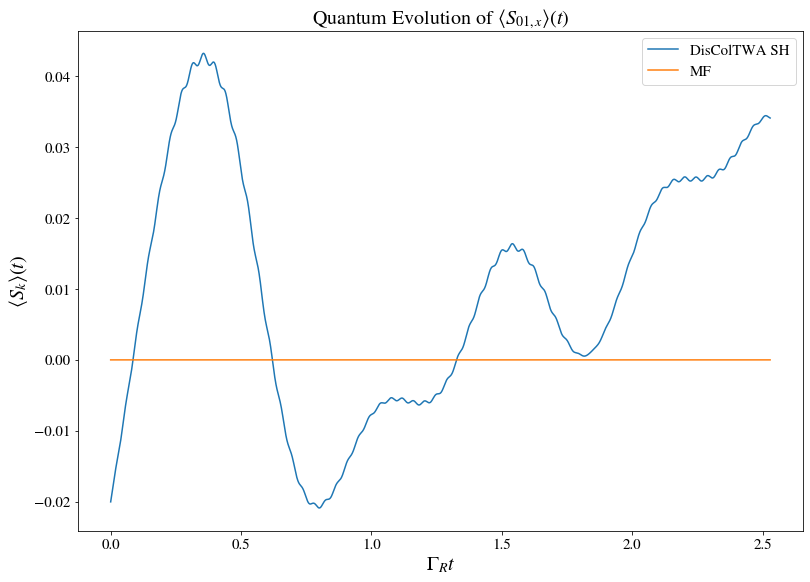

In [ ]:


matplotlib.rcParams['figure.figsize'] = (13.0, 9.2)


plt.title(r'Quantum Evolution of $\langle S_{01,x} \rangle (t)$', fontsize = label_size)
plt.xlabel(r'$\Gamma_R t$', fontsize = label_size)
#plt.ylabel(r'$\langle a^\dagger a\rangle(t)$', fontsize = label_size)
plt.ylabel(r'$\langle S_k \rangle(t)$', fontsize = label_size)






reductor=1000
index=0

label_size = 20

#plt.plot(partit(reductor,t*GammaR),partit(reductor,A[0][index]),label="NE sparse")
plt.plot(partit(reductor,t_alt*chi),partit(reductor,Result_varTWA_Col_SDE_SH[:,index]/sqrt(2)),label="DisColTWA SH")
#plt.plot(partit(reductor,t_alt*chi),partit(reductor,Result_varTWA_Col_SDE[:,index]/sqrt(2)),label="DisColTWA EM")
#plt.plot(partit(reductor,t_alt*chi),partit(reductor,Result_var_Col_TWA[:,index]/sqrt(2)),label="TWA")
plt.plot(partit(reductor,t_alt*chi),partit(reductor,Mean_field_res[:,index]/sqrt(2)),label="MF")




plt.legend()

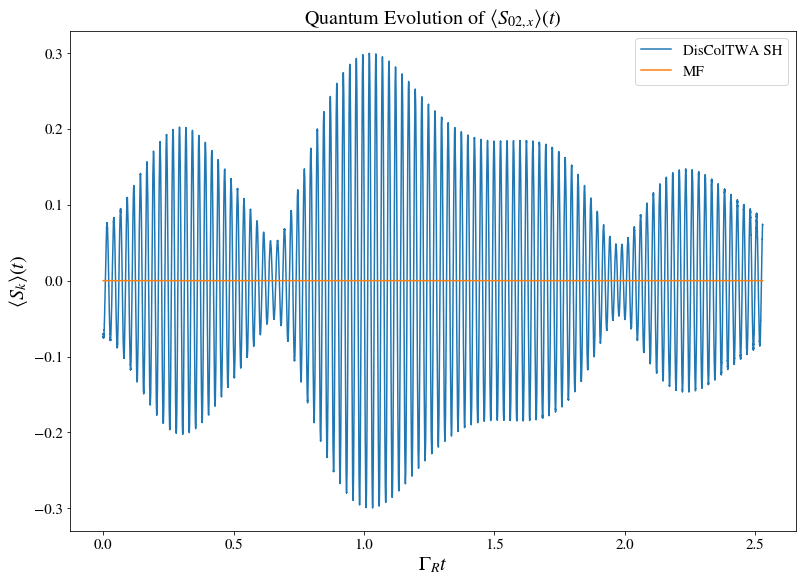

In [ ]:



matplotlib.rcParams['figure.figsize'] = (13.0, 9.2)


plt.title(r'Quantum Evolution of $\langle S_{02,x} \rangle (t)$', fontsize = label_size)
plt.xlabel(r'$\Gamma_R t$', fontsize = label_size)
#plt.ylabel(r'$\langle a^\dagger a\rangle(t)$', fontsize = label_size)
plt.ylabel(r'$\langle S_k \rangle(t)$', fontsize = label_size)






reductor=100
index=1

label_size = 20

#plt.plot(partit(reductor,t*GammaR),partit(reductor,A[0][index]),label="NE sparse")
plt.plot(partit(reductor,t_alt*chi),partit(reductor,Result_varTWA_Col_SDE_SH[:,index]/sqrt(2)),label="DisColTWA SH")
#plt.plot(partit(reductor,t_alt*chi),partit(reductor,Result_varTWA_Col_SDE[:,index]/sqrt(2)),label="DisColTWA EM")


#plt.plot(partit(reductor,t_alt*chi),partit(reductor,Result_var_Col_TWA[:,index]/sqrt(2)),label="TWA")


plt.plot(partit(reductor,t_alt*chi),partit(reductor,Mean_field_res[:,index]/sqrt(2)),label="MF")





plt.legend()

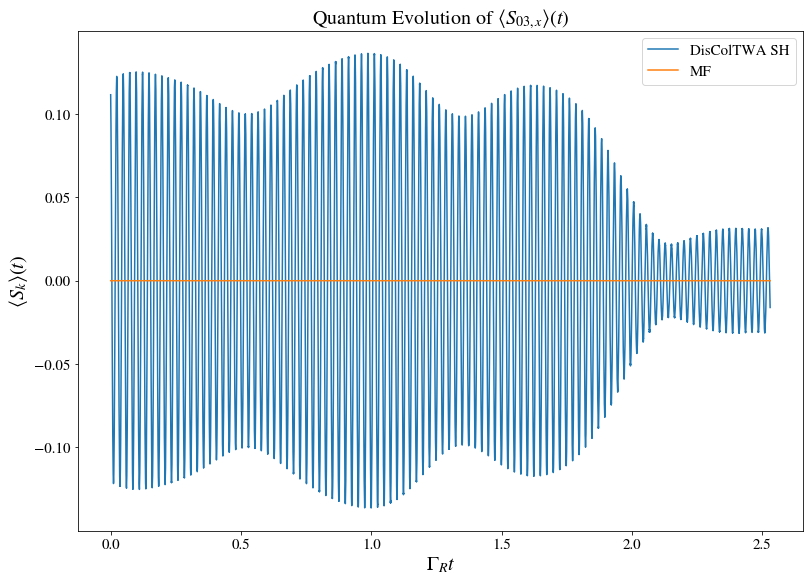

In [ ]:



matplotlib.rcParams['figure.figsize'] = (13.0, 9.2)


plt.title(r'Quantum Evolution of $\langle S_{03,x} \rangle (t)$', fontsize = label_size)
plt.xlabel(r'$\Gamma_R t$', fontsize = label_size)
#plt.ylabel(r'$\langle a^\dagger a\rangle(t)$', fontsize = label_size)
plt.ylabel(r'$\langle S_k \rangle(t)$', fontsize = label_size)






reductor=100
index=2

label_size = 20

#plt.plot(partit(reductor,t*GammaR),partit(reductor,A[0][index]),label="NE sparse")
plt.plot(partit(reductor,t_alt*chi),partit(reductor,Result_varTWA_Col_SDE_SH[:,index]/sqrt(2)),label="DisColTWA SH")
#plt.plot(partit(reductor,t_alt*chi),partit(reductor,Result_varTWA_Col_SDE[:,index]/sqrt(2)),label="DisColTWA EM")


#plt.plot(partit(reductor,t_alt*chi),partit(reductor,Result_var_Col_TWA[:,index]/sqrt(2)),label="TWA")


plt.plot(partit(reductor,t_alt*chi),partit(reductor,Mean_field_res[:,index]/sqrt(2)),label="MF")




plt.legend()

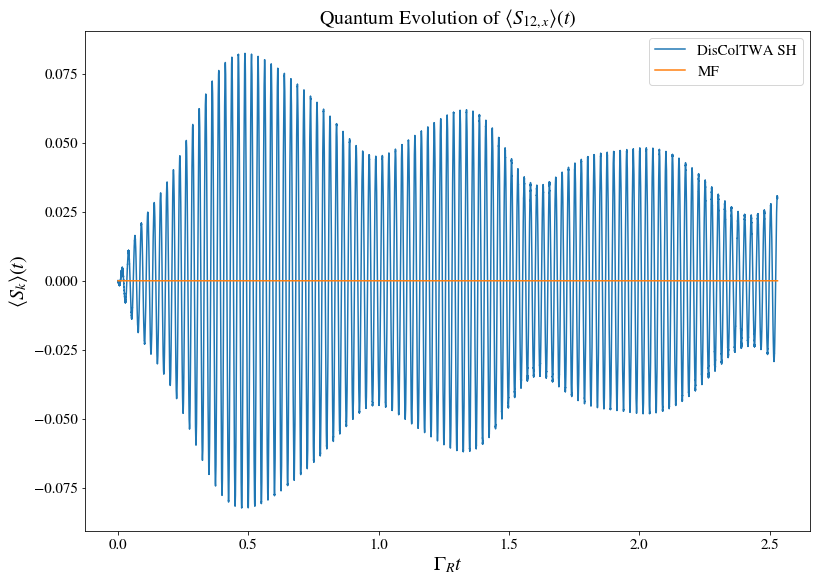

In [ ]:



matplotlib.rcParams['figure.figsize'] = (13.0, 9.2)


plt.title(r'Quantum Evolution of $\langle S_{12,x} \rangle (t)$', fontsize = label_size)
plt.xlabel(r'$\Gamma_R t$', fontsize = label_size)
#plt.ylabel(r'$\langle a^\dagger a\rangle(t)$', fontsize = label_size)
plt.ylabel(r'$\langle S_k \rangle(t)$', fontsize = label_size)






reductor=100
index=3

label_size = 20

#plt.plot(partit(reductor,t*GammaR),partit(reductor,A[0][index]),label="NE sparse")
plt.plot(partit(reductor,t_alt*chi),partit(reductor,Result_varTWA_Col_SDE_SH[:,index]/sqrt(2)),label="DisColTWA SH")
#plt.plot(partit(reductor,t_alt*chi),partit(reductor,Result_varTWA_Col_SDE[:,index]/sqrt(2)),label="DisColTWA EM")


#plt.plot(partit(reductor,t_alt*chi),partit(reductor,Result_var_Col_TWA[:,index]/sqrt(2)),label="TWA")


plt.plot(partit(reductor,t_alt*chi),partit(reductor,Mean_field_res[:,index]/sqrt(2)),label="MF")





plt.legend()

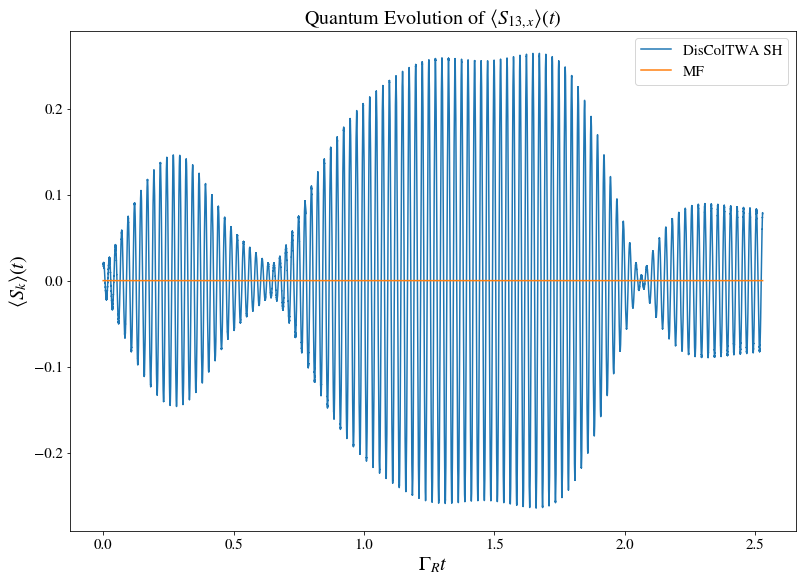

In [ ]:



matplotlib.rcParams['figure.figsize'] = (13.0, 9.2)


plt.title(r'Quantum Evolution of $\langle S_{13,x} \rangle (t)$', fontsize = label_size)
plt.xlabel(r'$\Gamma_R t$', fontsize = label_size)
#plt.ylabel(r'$\langle a^\dagger a\rangle(t)$', fontsize = label_size)
plt.ylabel(r'$\langle S_k \rangle(t)$', fontsize = label_size)






reductor=100
index=4

label_size = 20

#plt.plot(partit(reductor,t*GammaR),partit(reductor,A[0][index]),label="NE sparse")
plt.plot(partit(reductor,t_alt*chi),partit(reductor,Result_varTWA_Col_SDE_SH[:,index]/sqrt(2)),label="DisColTWA SH")
#plt.plot(partit(reductor,t_alt*chi),partit(reductor,Result_varTWA_Col_SDE[:,index]/sqrt(2)),label="DisColTWA EM")


#plt.plot(partit(reductor,t_alt*chi),partit(reductor,Result_var_Col_TWA[:,index]/sqrt(2)),label="TWA")


plt.plot(partit(reductor,t_alt*chi),partit(reductor,Mean_field_res[:,index]/sqrt(2)),label="MF")




plt.legend()

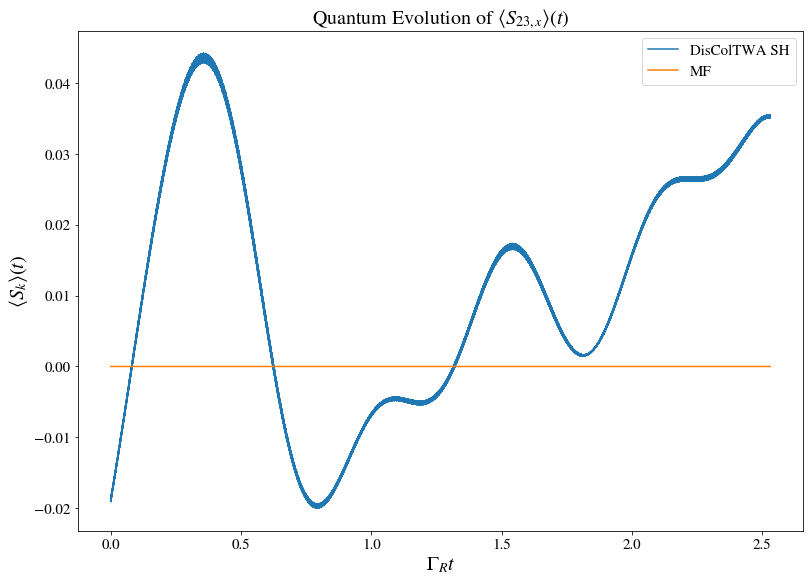

In [ ]:



matplotlib.rcParams['figure.figsize'] = (13.0, 9.2)


plt.title(r'Quantum Evolution of $\langle S_{23,x} \rangle (t)$', fontsize = label_size)
plt.xlabel(r'$\Gamma_R t$', fontsize = label_size)
#plt.ylabel(r'$\langle a^\dagger a\rangle(t)$', fontsize = label_size)
plt.ylabel(r'$\langle S_k \rangle(t)$', fontsize = label_size)






reductor=100
index=5

label_size = 20

#plt.plot(partit(reductor,t*GammaR),partit(reductor,A[0][index]),label="NE sparse")
plt.plot(partit(reductor,t_alt*chi),partit(reductor,Result_varTWA_Col_SDE_SH[:,index]/sqrt(2)),label="DisColTWA SH")
#plt.plot(partit(reductor,t_alt*chi),partit(reductor,Result_varTWA_Col_SDE[:,index]/sqrt(2)),label="DisColTWA EM")


#plt.plot(partit(reductor,t_alt*chi),partit(reductor,Result_var_Col_TWA[:,index]/sqrt(2)),label="TWA")


plt.plot(partit(reductor,t_alt*chi),partit(reductor,Mean_field_res[:,index]/sqrt(2)),label="MF")





plt.legend()

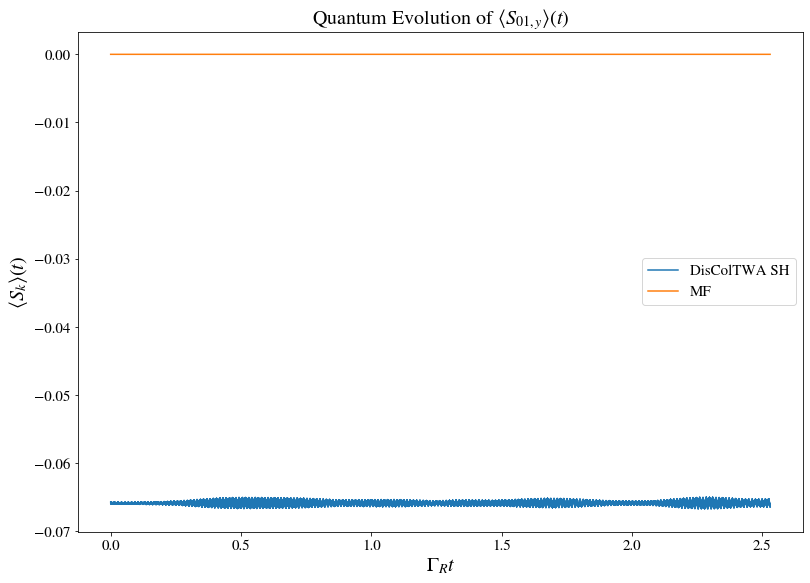

In [ ]:



matplotlib.rcParams['figure.figsize'] = (13.0, 9.2)


plt.title(r'Quantum Evolution of $\langle S_{01,y} \rangle (t)$', fontsize = label_size)
plt.xlabel(r'$\Gamma_R t$', fontsize = label_size)
#plt.ylabel(r'$\langle a^\dagger a\rangle(t)$', fontsize = label_size)
plt.ylabel(r'$\langle S_k \rangle(t)$', fontsize = label_size)






reductor=100
index=0

label_size = 20

#plt.plot(partit(reductor,t*GammaR),partit(reductor,A[0][index]),label="NE sparse")
plt.plot(partit(reductor,t_alt*chi),partit(reductor,Result_varTWA_Col_SDE_SH[:,index+6]/sqrt(2)),label="DisColTWA SH")
#plt.plot(partit(reductor,t_alt*chi),partit(reductor,Result_varTWA_Col_SDE[:,index+6]/sqrt(2)),label="DisColTWA EM")


#plt.plot(partit(reductor,t_alt*chi),partit(reductor,Result_var_Col_TWA[:,index+6]/sqrt(2)),label="TWA")


plt.plot(partit(reductor,t_alt*chi),partit(reductor,Mean_field_res[:,index+6]/sqrt(2)),label="MF")






plt.legend()

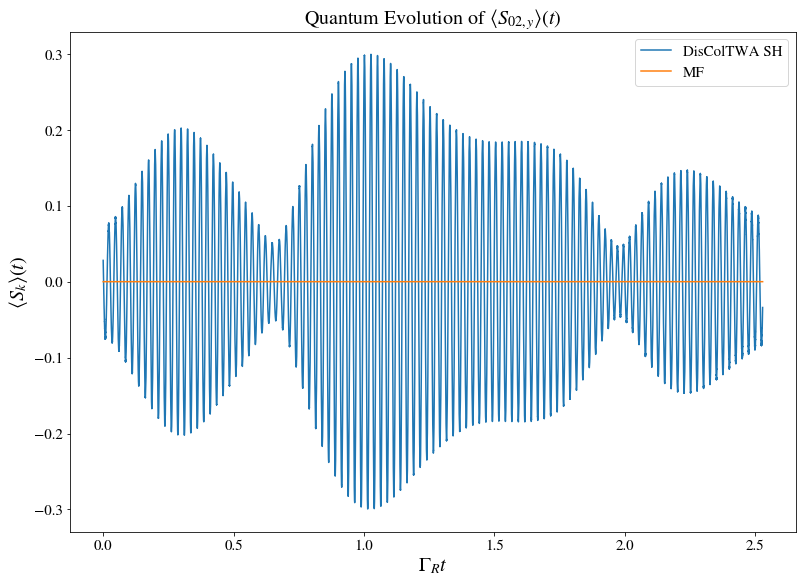

In [ ]:



matplotlib.rcParams['figure.figsize'] = (13.0, 9.2)


plt.title(r'Quantum Evolution of $\langle S_{02,y} \rangle (t)$', fontsize = label_size)
plt.xlabel(r'$\Gamma_R t$', fontsize = label_size)
#plt.ylabel(r'$\langle a^\dagger a\rangle(t)$', fontsize = label_size)
plt.ylabel(r'$\langle S_k \rangle(t)$', fontsize = label_size)






reductor=100
index=1

label_size = 20

#plt.plot(partit(reductor,t*GammaR),partit(reductor,A[0][index]),label="NE sparse")
plt.plot(partit(reductor,t_alt*chi),partit(reductor,Result_varTWA_Col_SDE_SH[:,index+6]/sqrt(2)),label="DisColTWA SH")
#plt.plot(partit(reductor,t_alt*chi),partit(reductor,Result_varTWA_Col_SDE[:,index+6]/sqrt(2)),label="DisColTWA EM")


#plt.plot(partit(reductor,t_alt*chi),partit(reductor,Result_var_Col_TWA[:,index+6]/sqrt(2)),label="TWA")


plt.plot(partit(reductor,t_alt*chi),partit(reductor,Mean_field_res[:,index+6]/sqrt(2)),label="MF")






plt.legend()

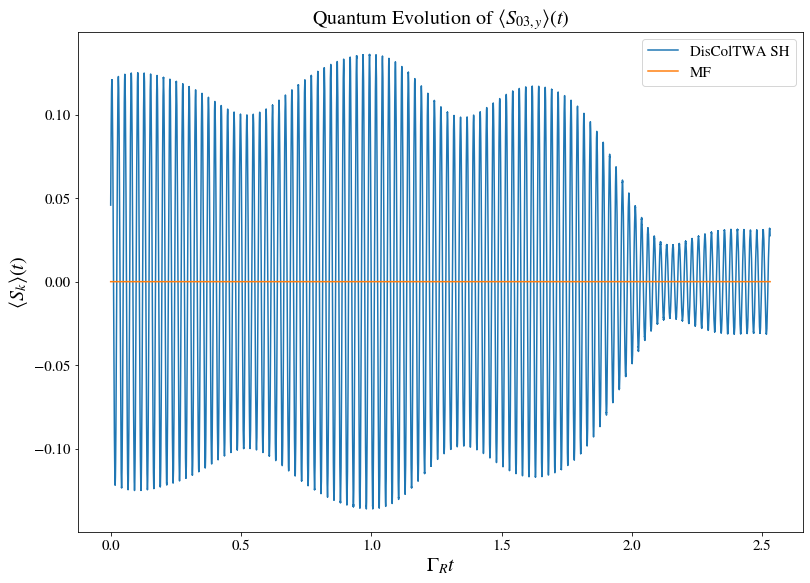

In [ ]:



matplotlib.rcParams['figure.figsize'] = (13.0, 9.2)


plt.title(r'Quantum Evolution of $\langle S_{03,y} \rangle (t)$', fontsize = label_size)
plt.xlabel(r'$\Gamma_R t$', fontsize = label_size)
#plt.ylabel(r'$\langle a^\dagger a\rangle(t)$', fontsize = label_size)
plt.ylabel(r'$\langle S_k \rangle(t)$', fontsize = label_size)






reductor=100
index=2

label_size = 20

#plt.plot(partit(reductor,t*GammaR),partit(reductor,A[0][index]),label="NE sparse")
plt.plot(partit(reductor,t_alt*chi),partit(reductor,Result_varTWA_Col_SDE_SH[:,index+6]/sqrt(2)),label="DisColTWA SH")
#plt.plot(partit(reductor,t_alt*chi),partit(reductor,Result_varTWA_Col_SDE[:,index+6]/sqrt(2)),label="DisColTWA EM")


#plt.plot(partit(reductor,t_alt*chi),partit(reductor,Result_var_Col_TWA[:,index+6]/sqrt(2)),label="TWA")


plt.plot(partit(reductor,t_alt*chi),partit(reductor,Mean_field_res[:,index+6]/sqrt(2)),label="MF")






plt.legend()

In [ ]:
N

40

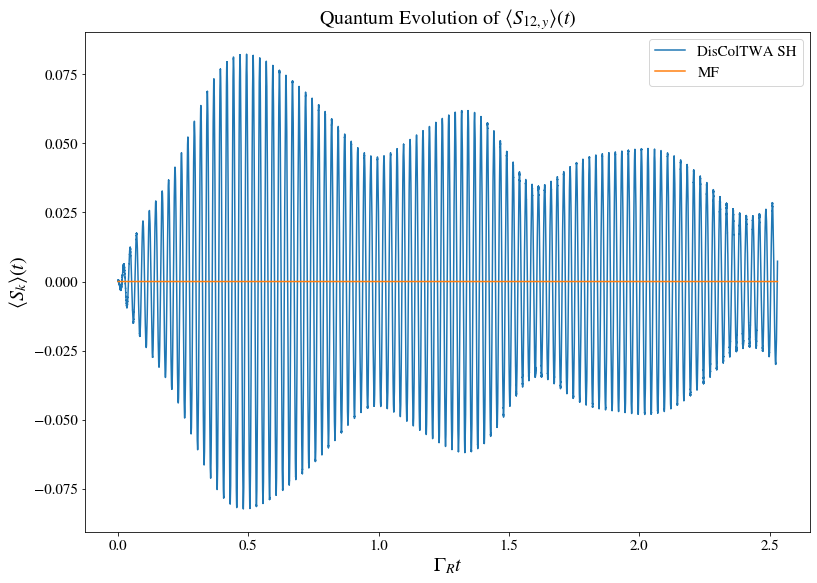

In [ ]:



matplotlib.rcParams['figure.figsize'] = (13.0, 9.2)


plt.title(r'Quantum Evolution of $\langle S_{12,y} \rangle (t)$', fontsize = label_size)
plt.xlabel(r'$\Gamma_R t$', fontsize = label_size)
#plt.ylabel(r'$\langle a^\dagger a\rangle(t)$', fontsize = label_size)
plt.ylabel(r'$\langle S_k \rangle(t)$', fontsize = label_size)






reductor=100
index=3

label_size = 20

#plt.plot(partit(reductor,t*GammaR),partit(reductor,A[0][index]),label="NE sparse")
plt.plot(partit(reductor,t_alt*chi),partit(reductor,Result_varTWA_Col_SDE_SH[:,index+6]/sqrt(2)),label="DisColTWA SH")
#plt.plot(partit(reductor,t_alt*chi),partit(reductor,Result_varTWA_Col_SDE[:,index+6]/sqrt(2)),label="DisColTWA EM")


#plt.plot(partit(reductor,t_alt*chi),partit(reductor,Result_var_Col_TWA[:,index+6]/sqrt(2)),label="TWA")


plt.plot(partit(reductor,t_alt*chi),partit(reductor,Mean_field_res[:,index+6]/sqrt(2)),label="MF")





plt.legend()

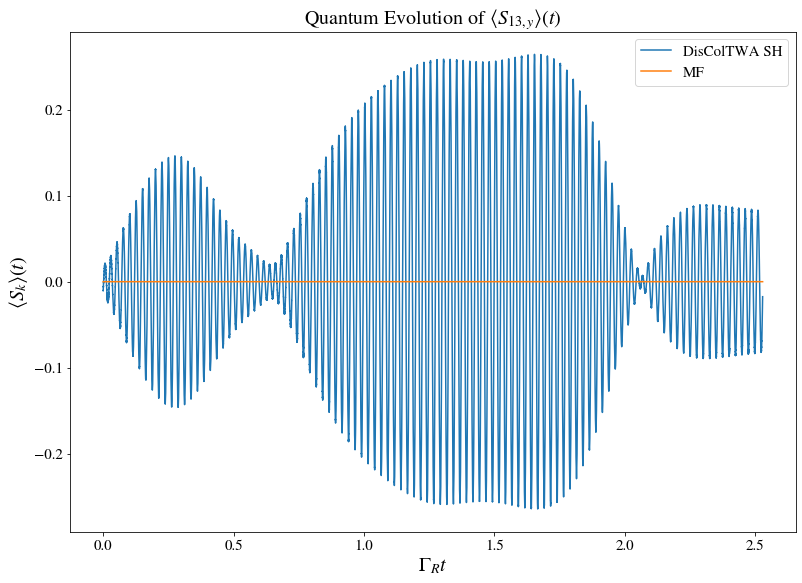

In [ ]:



matplotlib.rcParams['figure.figsize'] = (13.0, 9.2)


plt.title(r'Quantum Evolution of $\langle S_{13,y} \rangle (t)$', fontsize = label_size)
plt.xlabel(r'$\Gamma_R t$', fontsize = label_size)
#plt.ylabel(r'$\langle a^\dagger a\rangle(t)$', fontsize = label_size)
plt.ylabel(r'$\langle S_k \rangle(t)$', fontsize = label_size)






reductor=100
index=4

label_size = 20

#plt.plot(partit(reductor,t*GammaR),partit(reductor,A[0][index]),label="NE sparse")
plt.plot(partit(reductor,t_alt*chi),partit(reductor,Result_varTWA_Col_SDE_SH[:,index+6]/sqrt(2)),label="DisColTWA SH")
#plt.plot(partit(reductor,t_alt*chi),partit(reductor,Result_varTWA_Col_SDE[:,index+6]/sqrt(2)),label="DisColTWA EM")


#plt.plot(partit(reductor,t_alt*chi),partit(reductor,Result_var_Col_TWA[:,index+6]/sqrt(2)),label="TWA")


plt.plot(partit(reductor,t_alt*chi),partit(reductor,Mean_field_res[:,index+6]/sqrt(2)),label="MF")





plt.legend()

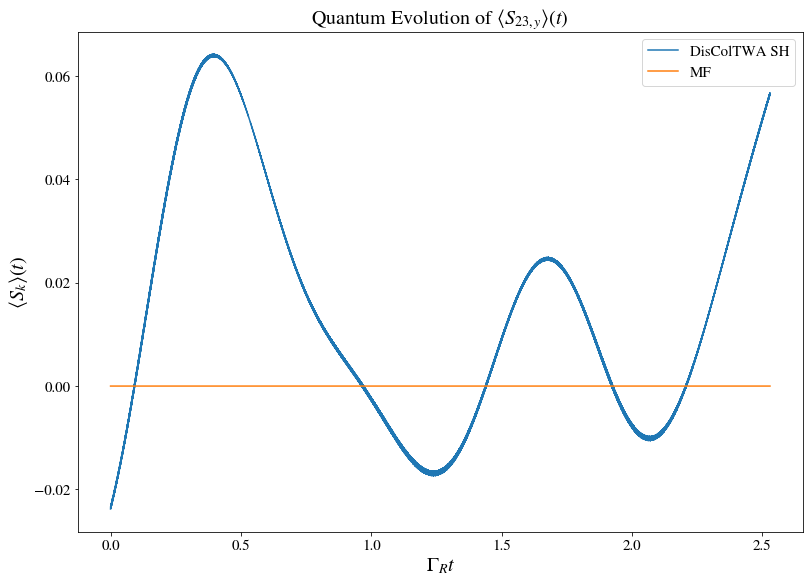

In [ ]:



matplotlib.rcParams['figure.figsize'] = (13.0, 9.2)


plt.title(r'Quantum Evolution of $\langle S_{23,y} \rangle (t)$', fontsize = label_size)
plt.xlabel(r'$\Gamma_R t$', fontsize = label_size)
#plt.ylabel(r'$\langle a^\dagger a\rangle(t)$', fontsize = label_size)
plt.ylabel(r'$\langle S_k \rangle(t)$', fontsize = label_size)






reductor=100
index=5

label_size = 20

#plt.plot(partit(reductor,t*GammaR),partit(reductor,A[0][index]),label="NE sparse")
plt.plot(partit(reductor,t_alt*chi),partit(reductor,Result_varTWA_Col_SDE_SH[:,index+6]/sqrt(2)),label="DisColTWA SH")
#plt.plot(partit(reductor,t_alt*chi),partit(reductor,Result_varTWA_Col_SDE[:,index+6]/sqrt(2)),label="DisColTWA EM")


#plt.plot(partit(reductor,t_alt*chi),partit(reductor,Result_var_Col_TWA[:,index+6]/sqrt(2)),label="TWA")


plt.plot(partit(reductor,t_alt*chi),partit(reductor,Mean_field_res[:,index+6]/sqrt(2)),label="MF")






plt.legend()

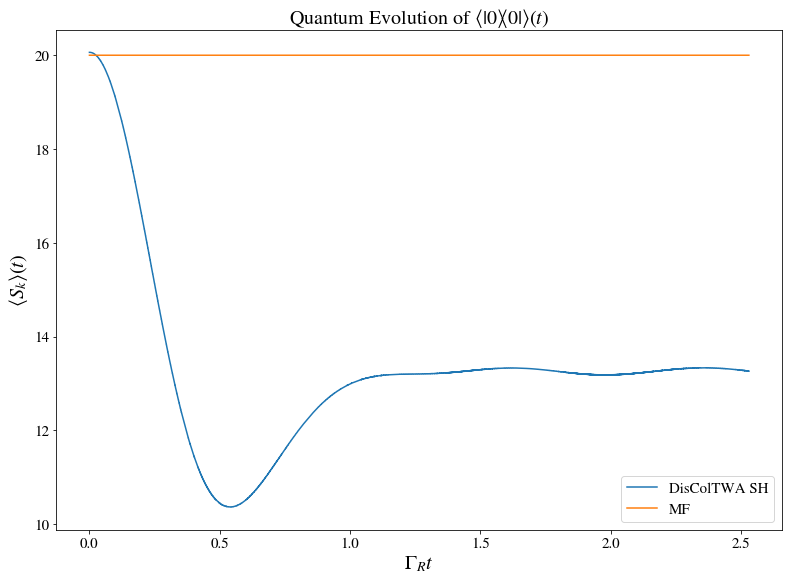

In [ ]:



matplotlib.rcParams['figure.figsize'] = (13.0, 9.2)


plt.title(r'Quantum Evolution of $\langle \left| 0 \rangle \!\! \langle0 \right|  \rangle (t)$', fontsize = label_size)
plt.xlabel(r'$\Gamma_R t$', fontsize = label_size)
#plt.ylabel(r'$\langle a^\dagger a\rangle(t)$', fontsize = label_size)
plt.ylabel(r'$\langle S_k \rangle(t)$', fontsize = label_size)






reductor=100
index=0

label_size = 20

#plt.plot(partit(reductor,t*GammaR),partit(reductor,A[0][index]),label="NE sparse")
plt.plot(partit(reductor,t_alt*chi),partit(reductor,Result_varTWA_Col_SDE_SH[:,index+12]/sqrt(1)),label="DisColTWA SH")
#plt.plot(partit(reductor,t_alt*chi),partit(reductor,Result_varTWA_Col_SDE[:,index+12]/sqrt(1)),label="DisColTWA EM")


#plt.plot(partit(reductor,t_alt*chi),partit(reductor,Result_var_Col_TWA[:,index+12]/sqrt(1)),label="TWA")


plt.plot(partit(reductor,t_alt*chi),partit(reductor,Mean_field_res[:,index+12]/sqrt(1)),label="MF")




plt.legend()

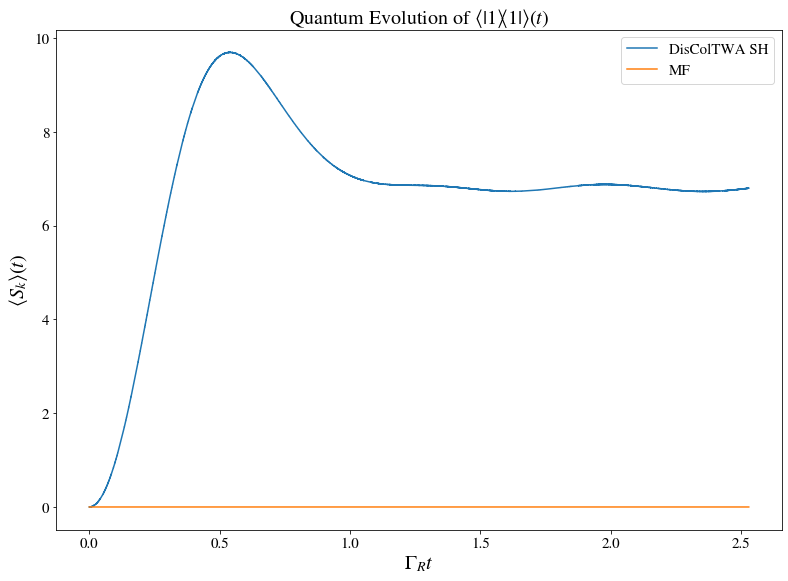

In [ ]:



matplotlib.rcParams['figure.figsize'] = (13.0, 9.2)


plt.title(r'Quantum Evolution of $\langle \left| 1 \rangle \!\! \langle 1 \right|  \rangle (t)$', fontsize = label_size)
plt.xlabel(r'$\Gamma_R t$', fontsize = label_size)
#plt.ylabel(r'$\langle a^\dagger a\rangle(t)$', fontsize = label_size)
plt.ylabel(r'$\langle S_k \rangle(t)$', fontsize = label_size)






reductor=100
index=1

label_size = 20

#plt.plot(partit(reductor,t*GammaR),partit(reductor,A[0][index]),label="NE sparse")
plt.plot(partit(reductor,t_alt*chi),partit(reductor,Result_varTWA_Col_SDE_SH[:,index+12]/sqrt(1)),label="DisColTWA SH")
#plt.plot(partit(reductor,t_alt*chi),partit(reductor,Result_varTWA_Col_SDE[:,index+12]/sqrt(1)),label="DisColTWA EM")


#plt.plot(partit(reductor,t_alt*chi),partit(reductor,Result_var_Col_TWA[:,index+12]/sqrt(1)),label="TWA")


plt.plot(partit(reductor,t_alt*chi),partit(reductor,Mean_field_res[:,index+12]/sqrt(1)),label="MF")







plt.legend()

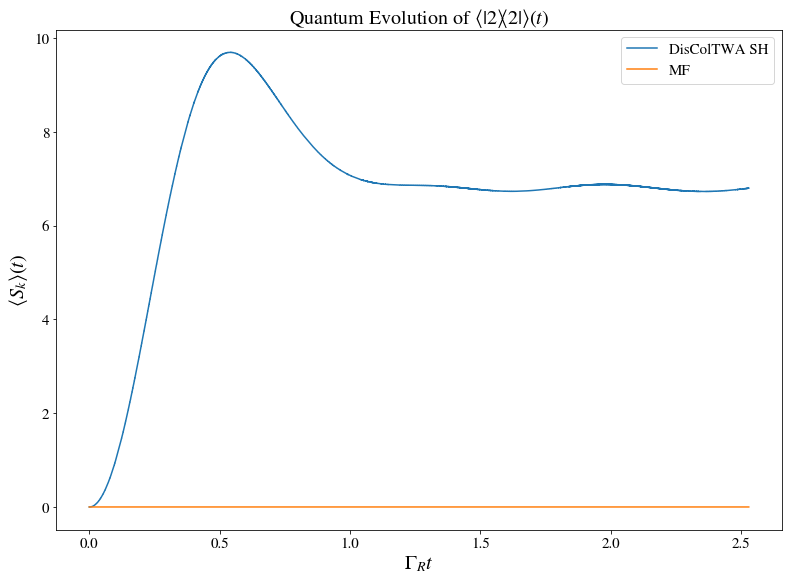

In [ ]:



matplotlib.rcParams['figure.figsize'] = (13.0, 9.2)


plt.title(r'Quantum Evolution of $\langle \left| 2 \rangle \!\! \langle 2 \right|  \rangle (t)$', fontsize = label_size)
plt.xlabel(r'$\Gamma_R t$', fontsize = label_size)
#plt.ylabel(r'$\langle a^\dagger a\rangle(t)$', fontsize = label_size)
plt.ylabel(r'$\langle S_k \rangle(t)$', fontsize = label_size)






reductor=100
index=2

label_size = 20

#plt.plot(partit(reductor,t*GammaR),partit(reductor,A[0][index]),label="NE sparse")
plt.plot(partit(reductor,t_alt*chi),partit(reductor,Result_varTWA_Col_SDE_SH[:,index+12]/sqrt(1)),label="DisColTWA SH")
#plt.plot(partit(reductor,t_alt*chi),partit(reductor,Result_varTWA_Col_SDE[:,index+12]/sqrt(1)),label="DisColTWA EM")


#plt.plot(partit(reductor,t_alt*chi),partit(reductor,Result_var_Col_TWA[:,index+12]/sqrt(1)),label="TWA")


plt.plot(partit(reductor,t_alt*chi),partit(reductor,Mean_field_res[:,index+12]/sqrt(1)),label="MF")






plt.legend()

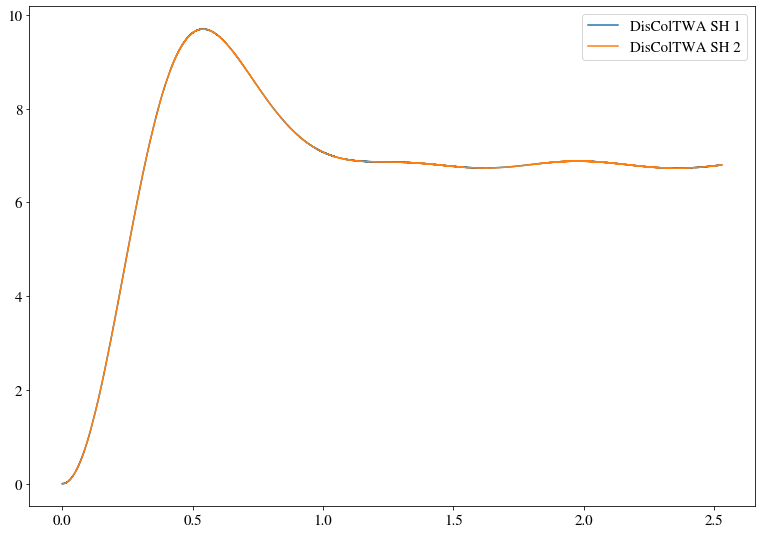

In [ ]:
index=1

plt.plot(partit(reductor,t_alt*chi),partit(reductor,Result_varTWA_Col_SDE_SH[:,index+12]/sqrt(1)),label="DisColTWA SH 1")
plt.plot(partit(reductor,t_alt*chi),partit(reductor,Result_varTWA_Col_SDE_SH[:,index+13]/sqrt(1)),label="DisColTWA SH 2")



plt.legend()

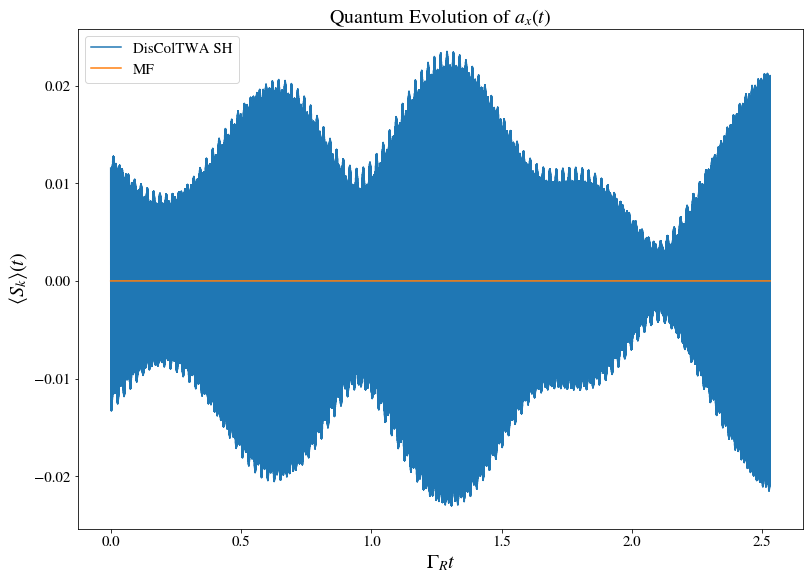

In [ ]:



matplotlib.rcParams['figure.figsize'] = (13.0, 9.2)


plt.title(r'Quantum Evolution of $a_x  (t)$', fontsize = label_size)
plt.xlabel(r'$\Gamma_R t$', fontsize = label_size)
#plt.ylabel(r'$\langle a^\dagger a\rangle(t)$', fontsize = label_size)
plt.ylabel(r'$\langle S_k \rangle(t)$', fontsize = label_size)






reductor=100
index=3

label_size = 20

#plt.plot(partit(reductor,t*GammaR),partit(reductor,A[0][index]),label="NE sparse")
plt.plot(partit(reductor,t_alt*chi),partit(reductor,Result_varTWA_Col_SDE_SH[:,index+12]/sqrt(1)),label="DisColTWA SH")
#plt.plot(partit(reductor,t_alt*chi),partit(reductor,Result_varTWA_Col_SDE[:,index+12]/sqrt(1)),label="DisColTWA EM")


#plt.plot(partit(reductor,t_alt*chi),partit(reductor,Result_var_Col_TWA[:,index+12]/sqrt(1)),label="TWA")


plt.plot(partit(reductor,t_alt*chi),partit(reductor,Mean_field_res[:,index+12]/sqrt(1)),label="MF")






plt.legend()

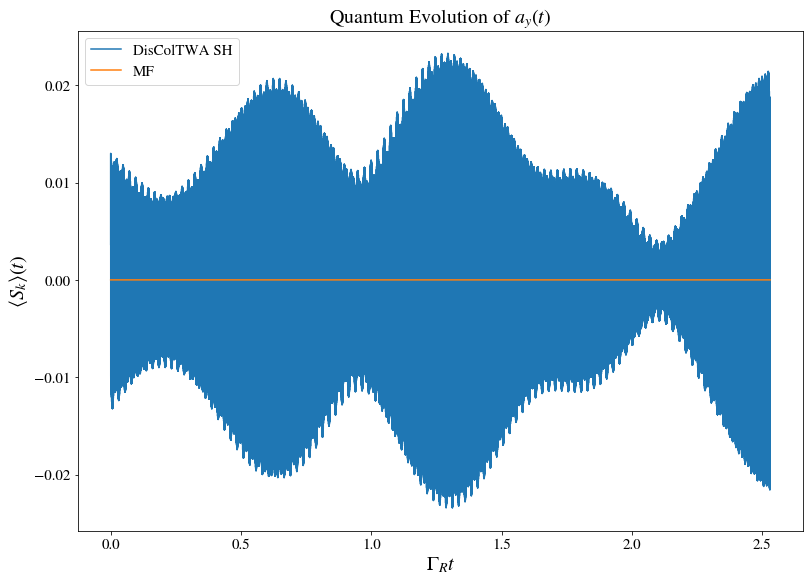

In [94]:



matplotlib.rcParams['figure.figsize'] = (13.0, 9.2)


plt.title(r'Quantum Evolution of $a_y  (t)$', fontsize = label_size)
plt.xlabel(r'$\Gamma_R t$', fontsize = label_size)
#plt.ylabel(r'$\langle a^\dagger a\rangle(t)$', fontsize = label_size)
plt.ylabel(r'$\langle S_k \rangle(t)$', fontsize = label_size)






reductor=100
index=4

label_size = 20

#plt.plot(partit(reductor,t*GammaR),partit(reductor,A[0][index]),label="NE sparse")
plt.plot(partit(reductor,t_alt*chi),partit(reductor,Result_varTWA_Col_SDE_SH[:,index+12]/sqrt(1)),label="DisColTWA SH")
#plt.plot(partit(reductor,t_alt*chi),partit(reductor,Result_varTWA_Col_SDE[:,index+12]/sqrt(1)),label="DisColTWA EM")


#plt.plot(partit(reductor,t_alt*chi),partit(reductor,Result_var_Col_TWA[:,index+12]/sqrt(1)),label="TWA")


plt.plot(partit(reductor,t_alt*chi),partit(reductor,Mean_field_res[:,index+12]/sqrt(1)),label="MF")






plt.legend()